In [1]:
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from scipy.integrate import simpson

We will try to construct an approximation of $f(x) = x$ on $x \in [-\pi , \pi]$


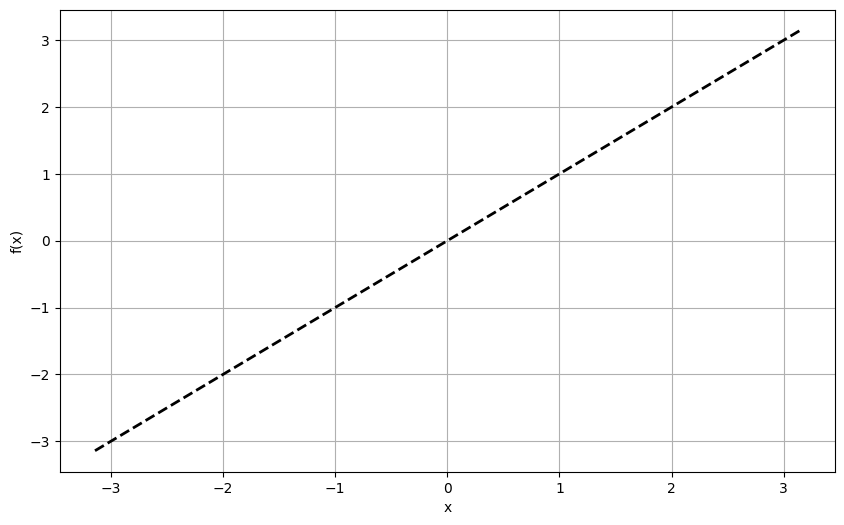

In [2]:

def f(x):
  return x


x = np.linspace(-np.pi, np.pi, 500)

plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.plot(x, f(x), 'k--', lw=2)

The basis of functions we will use is
$$ \{f_n(x) = \frac{1}{\sqrt{\pi}}\sin n x | n \in \mathbb{Z}\}$$
We can find the expansion coefficients by computing the inner products
$$
c_n = (f_n, f) = \frac{1}{\sqrt{\pi}}\int_{-\pi}^{\pi} dx x \sin n x = \frac{2(-1)^{n+1}\sqrt{\pi}}{n}
$$

The function below implements the finite sum approximation to $f(x)$:
$$
f_N(x) = \sum_{n=1}^{N} c_n \frac{1}{\sqrt{\pi}}\sin n x
$$

In [3]:
def odd_sawtooth_fourier(x, nmax):
    n = np.arange(1, nmax+1)
    return(2.*np.sum(np.power(-1.,n+1)*np.sin(n*x)/n))

In [4]:


def plot_fourier(nmax):
    x = np.linspace(-np.pi, np.pi, 500)

    y = [odd_sawtooth_fourier(xi, nmax) for xi in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.title(f'Fourier Series Approximation (nmax = {nmax})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.plot(x, f(x), 'k--', lw=2)
    plt.legend()
    plt.show()



interact(plot_fourier, nmax=widgets.IntSlider(min=1, max=100, step=1, value=10));

interactive(children=(IntSlider(value=10, description='nmax', min=1), Output()), _dom_classes=('widget-interac…

Next let's compute the error as a function of the number of terms included in the series:
$$\mathcal{E}_N = \int_{a}^{b} \left|f(x) - \sum_{n}^N c_n f_n(x) \right|^2 dx $$

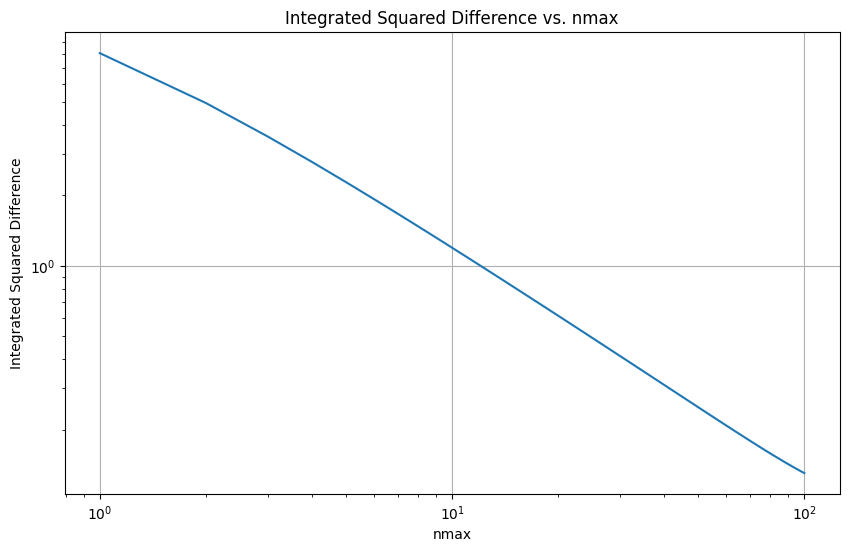

In [5]:


def integrated_squared_difference(nmax, x):
    # The actual odd sawtooth wave function f(x) = x for -pi < x < pi
    f_x = x
    # Fourier series approximation
    fourier_approx = np.array([odd_sawtooth_fourier(xi, nmax) for xi in x])
    # Squared difference
    squared_diff = (fourier_approx - f_x)**2
    # Numerical integral of the squared difference
    integral = simpson(squared_diff, x)
    return integral

nmax_values = np.arange(1, 101)  # Range of nmax values to test
integrated_diff_values = [integrated_squared_difference(n, np.linspace(-np.pi, np.pi, 500)) for n in nmax_values]

plt.figure(figsize=(10, 6))
plt.plot(nmax_values, integrated_diff_values)
plt.title('Integrated Squared Difference vs. nmax')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('nmax')
plt.ylabel('Integrated Squared Difference')
plt.grid(True)
plt.show()

We see that $$\lim_{N\to \infty }\mathcal{E}_N = 0$$

Next we illustrate Bessel's inequality/completeness relation. For a finite number of terms we have the inequality
$$
(f,f) = \int_{a}^{b} |f(x)|^2 dx \geq \sum_{n=1}^N |c_n|^2
$$
If the basis is complete that as $N\to \infty$
$$(f,f) = \sum_{n=1}^\infty |c_n|^2$$

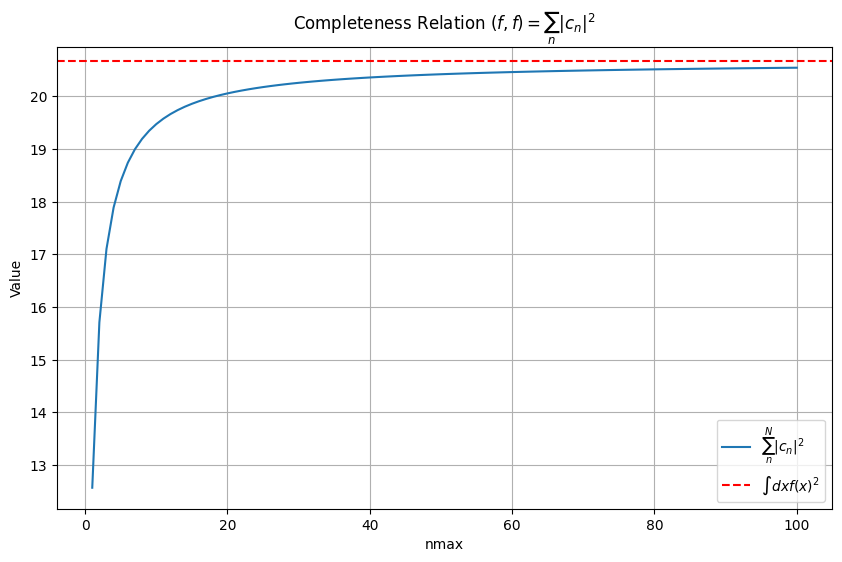

In [6]:
def sum_of_squared_coefficients(nmax):
    n = np.arange(1, nmax + 1)
    # The formula for c_n is (2 * (-1)**(n+1) * sqrt(pi)) / n
    # The squared coefficient |c_n|^2 is (4 * pi) / n^2
    squared_coeffs = (4 * np.pi) / (n**2)
    return np.sum(squared_coeffs)

# Calculate the integral of the squared function f(x) = x over [-pi, pi]
# Integral of x^2 from -pi to pi is [x^3/3] from -pi to pi = (pi^3/3) - (-pi^3/3) = 2*pi^3/3
integral_f_squared = 2 * np.pi**3 / 3

nmax_values = np.arange(1, 101)
sum_sq_coeffs_values = [sum_of_squared_coefficients(n) for n in nmax_values]

plt.figure(figsize=(10, 6))
plt.plot(nmax_values, sum_sq_coeffs_values, label=r'$\sum_n^{N} |c_n|^2$')
plt.axhline(y=integral_f_squared, color='r', linestyle='--', label=r'$\int dx f(x)^2$')
plt.title(r'Completeness Relation $(f,f) = \sum_n |c_n|^2$')
plt.xlabel('nmax')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# An incomplete set

In [8]:

def new_f(x):
  return x + np.power(x,2)


Let's try to expand a different function $$f(x) = x + x^2$$ which looks very different

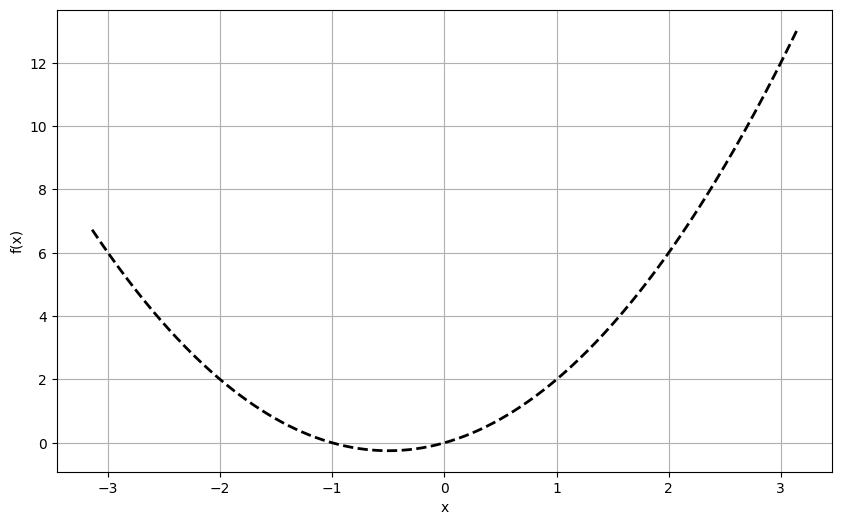

In [9]:
x = np.linspace(-np.pi, np.pi, 500)

plt.figure(figsize=(10, 6))
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.plot(x, new_f(x), 'k--', lw=2)

But the expansion coefficients are still the same!

$$
c_n = (f_n, f) = \frac{1}{\sqrt{\pi}}\int_{-\pi}^{\pi} dx (x + x^2) \sin n x = \frac{2(-1)^{n+1}\sqrt{\pi}}{n}
$$


In [10]:
def plot_fourier(nmax):
    x = np.linspace(-np.pi, np.pi, 500)

    y = [odd_sawtooth_fourier(xi, nmax) for xi in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.title(f'Fourier Series Approximation (nmax = {nmax})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.plot(x, new_f(x), 'k--', lw=2)
    plt.legend()
    plt.show()



interact(plot_fourier, nmax=widgets.IntSlider(min=1, max=100, step=1, value=10));

interactive(children=(IntSlider(value=10, description='nmax', min=1), Output()), _dom_classes=('widget-interac…

The error fails to approach 0 as we add more terms

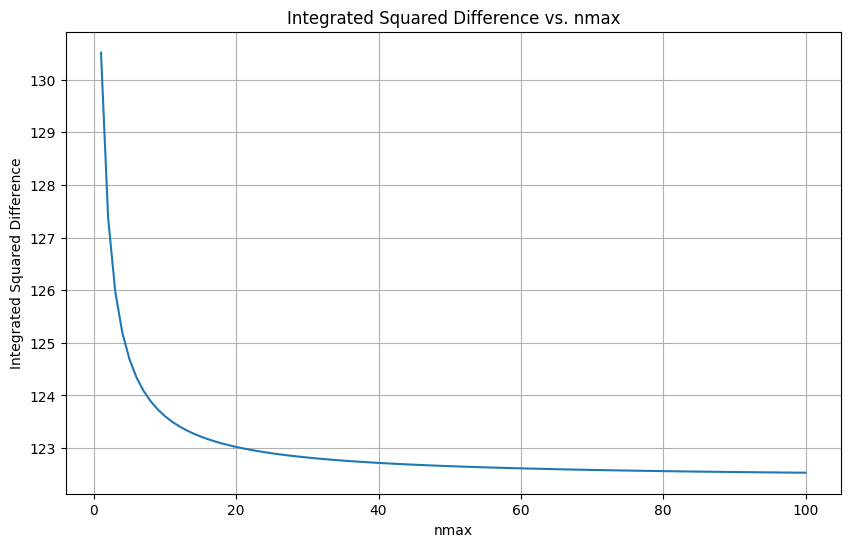

In [11]:
def integrated_squared_difference(nmax, x):
    # The actual odd sawtooth wave function f(x) = x for -pi < x < pi
    f_x = new_f(x)
    # Fourier series approximation
    fourier_approx = np.array([odd_sawtooth_fourier(xi, nmax) for xi in x])
    # Squared difference
    squared_diff = (fourier_approx - f_x)**2
    # Numerical integral of the squared difference
    integral = simpson(squared_diff, x)
    return integral

nmax_values = np.arange(1, 101)  # Range of nmax values to test
integrated_diff_values = [integrated_squared_difference(n, np.linspace(-np.pi, np.pi, 500)) for n in nmax_values]

plt.figure(figsize=(10, 6))
plt.plot(nmax_values, integrated_diff_values)
plt.title('Integrated Squared Difference vs. nmax')
#plt.yscale('log')
#plt.xscale('log')
plt.xlabel('nmax')
plt.ylabel('Integrated Squared Difference')
plt.grid(True)
plt.show()

This does not look like it is approaching 0 as we add more terms!
$$\lim_{N\to\infty}\mathcal{E}_N \neq 0$$

Our basis is not complete over all functions on $[-\pi,\pi]$.

# Global vs Local Expansions

The series we are discussing here approximate functions **globally**, i.e. over the entire interval $[a,b]$. We can contrast this with **local** approximations like the Taylor series, which approximate a function in a neighbourhood of a point. The example below illustrates this difference: the Fourier series is able to approximate the function on the entire interval $[-\pi,\pi]$.

In [13]:
def even_sawtooth_fourier(x, nmax):
    n = np.arange(1, nmax+1,2)
    return(np.pi/2 - (4./np.pi) * np.sum(np.cos(n*x)/np.power(n,2)))

x_vals = np.linspace(-np.pi, np.pi, 1000)
def f(x):
  return np.abs(x)

def plot_fourier(nmax):
    x = np.linspace(-np.pi, np.pi, 500)

    y = [even_sawtooth_fourier(xi, nmax) for xi in x]

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Fourier Series')
    plt.plot(x, x, label='Taylor Series')
    plt.title(f'Series Approximation (nmax = {nmax})')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True)
    plt.plot(x, f(x), 'k--', lw=2)
    plt.legend()
    plt.show()



interact(plot_fourier, nmax=widgets.IntSlider(min=1, max=10, step=1, value=1));

interactive(children=(IntSlider(value=1, description='nmax', max=10, min=1), Output()), _dom_classes=('widget-…